# 测试自己的手写数字识别

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ch07.simple_convnet import SimpleConvNet

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)

# 学习后的权重
network.load_params("ch07/params.pkl")

## 识别单个数字

In [7]:
# 尝试识别一串数字，用滑动窗口的方法
import imageio # for reading images
import glob # for reading files
import numpy as np # for arrays
import matplotlib.pyplot as plt # for plotting
%matplotlib inline

class ImagePredict:
    def __init__(self):
        self.imageArray = None

    def imageioRead2plt(self, imageFile):
        # @imageFile: the image file path
        # @return: the image data in a 1D array
        self.imageArray = imageio.imread(imageFile, as_gray=True)
        # 0 is white and 1 is black in the matplotlib image so we invert the array above
        img_data = 255.0 - self.imageArray.reshape(self.imageArray.size)

        # normalize the image data to be between 0.01 and 1.0
        img_data = (img_data / 255.0 * 0.99) + 0.01 
        return img_data

    def pltshow(self, img_data):
        # show the image 255 is white and 0 is black we turn it into a 28x28 array
        plt.imshow(np.asfarray(img_data).reshape((self.imageArray.shape)), cmap='Greys', interpolation='None')

    def predict(self, img_data, network):
        # 识别图片中的数字
        x = img_data
        y = network.predict(x.reshape(1,1,28,28))
        p = np.argmax(y) # 获取概率最高的元素的索引
        print("神经网络预测结果为:", p)
        return p
    
    def ReadShowPredict(self, imageFile, network):
        img_data = self.imageioRead2plt(imageFile)
        self.pltshow(img_data)
        return self.predict(img_data, network)

IP = ImagePredict()

In [8]:
## 识别单个数字测试
myImageNameList = []
for imageFile in glob.glob('myImages/*.png'):
    myImageNameList.append(imageFile)
    pass

神经网络预测结果为: 9
神经网络预测结果为: 1
神经网络预测结果为: 2
神经网络预测结果为: 3
神经网络预测结果为: 8
神经网络预测结果为: 5
神经网络预测结果为: 5
神经网络预测结果为: 7
神经网络预测结果为: 2
神经网络预测结果为: 7


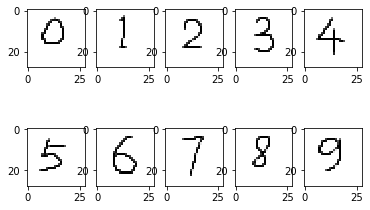

In [9]:

i = 1
w = 2
h = int( len(myImageNameList) / w)
for oneImage in myImageNameList:
    plt.subplot(w, h, i)
    IP.ReadShowPredict(oneImage, network)
    i = i + 1

    

## 识别多个数字

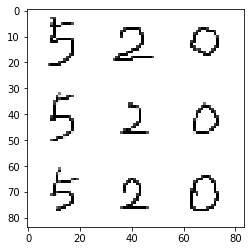

In [17]:
# 读入一张图片的数据 里面包含了一行数字
imageFile = 'numbers3.png'
img_data = IP.imageioRead2plt(imageFile)
IP.pltshow(img_data)

In [22]:
original_img_data = img_data.copy()
original_img_data = original_img_data.reshape(IP.imageArray.shape)
# 用滑动窗口的方法识别数字
# 从左到右 从上到下

# 识别数字的宽度
w = 28
# 识别数字的高度
h = 28
# 识别数字的间隔
g = 0
# 识别数字的总数
n = 3

# 识别数字的起始位置
x = 0
y = 0

# 识别数字的结束位置
xend = w * n + g * (n - 1)
yend = h * n + g * (n - 1)

# 识别数字的结果
result = []

神经网络预测结果为: 5
神经网络预测结果为: 2
神经网络预测结果为: 9
神经网络预测结果为: 5
神经网络预测结果为: 2
神经网络预测结果为: 0
神经网络预测结果为: 5
神经网络预测结果为: 9
神经网络预测结果为: 0
识别的数字为: [5, 2, 9, 5, 2, 0, 5, 9, 0]


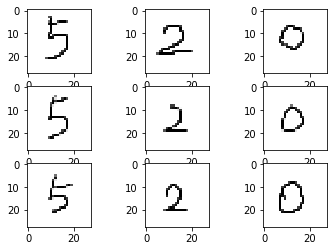

In [23]:
while y < yend:
    while x < xend:
        # 识别数字的区域
        ROI_img_data = original_img_data[y:y+h, x:x+w]
        tmp_img_data = ROI_img_data.reshape(1, 784)
        plt.subplot(3,3, len(result) + 1)
        plt.imshow(np.asfarray(tmp_img_data).reshape(w,h), cmap='Greys', interpolation='None')
        result.append(IP.predict(tmp_img_data, network))
        x = x + w + g
        pass
    y = y + h + g
    x = 0
    pass

print("识别的数字为:", result)

> 终于识别对了一组，非常感动